# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nurul Asyrifah
- **Email:** nu.asyrifah@gmail.com
- **ID Dicoding:**  A010XBF387

## 1. Menentukan Pertanyaan Bisnis

- Kapan waktu terbaik untuk kegiatan outdoor (luar ruangan)?
- Lokasi mana saja yang menunjukkan konsistensi terhadap tingkat polusi tinggi, dan perlu regulasi dan upaya mitigasi

## 2. Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd #untuk manipulasi dan analisis data
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #untuk visualiasi yang lebih interaktif

## 3. Data Wrangling

### 3.1 Gathering Data

3.1.1 Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Wanshouxigong_20130301-20170228.csv to PRSA_Data_Wanshouxigong_20130301-20170228 (3).csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-20170228 (3).csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228 (3).csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228 (3).csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228 (3).csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228 (3).csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228 (3).csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228 (3).csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228 (3).csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228 (3).csv
Saving PRSA_Data_Changping_20130301-2017

3.1.2 Gathering all files in one data-frame

In [ ]:
import pandas as pd

#upload banyak file:
dataframes = []
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    dataframes.append(df)

#menggabungkan semua DataFrame
df = pd.concat(dataframes, ignore_index=True)

print(df.shape)
df.head()


(420768, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
Dari tampilan beberapa baris data di atas diketahui bahwa:
  1. Data yang adalah adalah data dari beberapa parameter cuaca dan spesifik ke kondisi kualitas udara, yaitu komponen udara, suhu, tekanan udara, curah hujan, dsb.
  2. Data diambil dari kondisi udara di sekitar stasiun seperti stasiun Gucheng, Wanshouxigong, dll dengan frekuensi setiap jam.

### 3.2 Assessing Data

In [ ]:
#Menampilkan informasi dasar dari dataset
print("Informasi dasar tentang dataset:")
print(df.info())

#Menampilkan statistik deskriptif dari data
print("Statistik deskriptif dari dataset:")
print(df.describe())

#Memeriksa nilai yang hilang
print("Jumlah nilai yang hilang per kolom: ")
print(df.isnull().sum())

#Memeriksa data duplikat
print("Jumlah baris duplikat:")
print(df.duplicated().sum())

Informasi dasar tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None
Statist

**Insight:**
- Tipe data komponen udara adalah float, jadi direpresentasikan sebagai nilai desimal.
- Dari distibusi data kondisi udara, terlihat beberapa kondisi ekstrem dari rata-rata kondisi udara, seperti kandungan CO yang sangat tinggi 10000 dari rata-rata 1230.
- Terdapat nilai yang hilang dari setiap kolom parameter kondisi udara seperti PM2.5, PM10, dst.
- Tidak ada data terduplikasi

### 3.3 Cleaning Data

3.3.1. Mengisi data null dengan rolling window




In [ ]:
import pandas as pd

# menggabungkan datatime tahun , bulan, hari, dan jam
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# mengurutkan data
df = df.sort_values(by=['station', 'datetime'])

# menyalin data
df_cleaned = df.copy()

#pilih kolom-kolom yang memiliki datanull dengan tipe data numerik
numeric_columns = df.select_dtypes(include=['float64']).columns

#rolling window per stasiun
for col in numeric_columns:
    df_cleaned[col] = (
        df.groupby('station')[col]
        .apply(lambda x: x.fillna(x.rolling(window=5, center=True, min_periods=1).mean())) #diambil rata-rata dari 2 jam sebelum dan 2 jam sesudah dari baris data null.
        .reset_index(level=0, drop=True)
    )

# Cek apakah masih ada nilai kosong
print(df_cleaned.isnull().sum())


No              0
year            0
month           0
day             0
hour            0
PM2.5        3833
PM10         2658
SO2          4388
NO2          6148
CO          12889
O3           6200
TEMP           53
PRES           51
DEWP           53
RAIN           48
wd           1822
WSPM           24
station         0
datetime        0
dtype: int64


In [ ]:
def fill_wd_with_mode(series):
    filled = series.copy()
    for i in range(2, len(series) - 2):
        if pd.isna(series.iloc[i]):
            window = series.iloc[i - 2:i + 3]  # ambil 2 sebelum sampai 2 sesudah
            mode_val = window.dropna().mode()
            if not mode_val.empty:
                filled.iloc[i] = mode_val[0]  # ambil nilai modus
    return filled

# Terapkan per stasiun
df_cleaned['wd'] = (
    df.groupby('station')['wd']
    .apply(fill_wd_with_mode)
    .reset_index(level=0, drop=True)
)


**Insight:**
- Untuk meminimalisir data kondisi udara yang hilang akibat data null, maka data null untuk data yang kuantitatif diisi dengan nilai rata-rata. Ini dilakukan karena biasanya jarang terjadi perubahan kondisi udara secara ekstrem di daerah yang sama untuk tiap jam.
- Untuk data object yang tidak bisa diinterpretasikan menggunakan nilai rata-rata , kita melakukan drop row untuk kolom yang bernilai null.
- Dengan memiliki data tahun, bulan, tanggal, dan jam, kita bisa mengubahnya menjadi format datatime agarinterpretasi data bisa menjadi time series dan bisa ditunjukkan dengan visualisasi yang lebih kontekstual.   

In [ ]:
print("Jumlah nilai yang hilang per kolom setelah proses pembersihan:")
print(df_cleaned.isnull().sum())


Jumlah nilai yang hilang per kolom setelah proses pembersihan:
No              0
year            0
month           0
day             0
hour            0
PM2.5        3833
PM10         2658
SO2          4388
NO2          6148
CO          12889
O3           6200
TEMP           53
PRES           51
DEWP           53
RAIN           48
wd             45
WSPM           24
station         0
datetime        0
dtype: int64


3.3.2 Mengisi data null dengan interpolasi dan median global

In [ ]:
df_cleaned_copy = df_cleaned.sort_values(by=['station', 'datetime'])

#memilih kolom yang akan diisi
numeric_cols_with_nan = df_cleaned_copy.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_with_nan = [col for col in numeric_cols_with_nan if df_cleaned_copy[col].isnull().sum() > 0]

#Interpolasi per station berdasarkan waktu
df_cleaned_copy = df_cleaned_copy.sort_values(by=['station', 'datetime'])
for col in numeric_cols_with_nan:
    df_cleaned_copy[col] = df_cleaned_copy.groupby('station')[col].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

#mengisidengan median global
for col in numeric_cols_with_nan:
    df_cleaned_copy[col] = df_cleaned_copy[col].fillna(df_cleaned_copy[col].median())

Catatan : Ini adalah tahap pembersihan data kedua, setelah kita mencoba mengisi dari data 2 jam sebelum dan 2 jam sesudah mempertimbangkan bahwa kondisi cuaca biasanya tidak berbeda jauh dengan beberapa jam sebelum dan setelahnya. Kemudian kita mencoba untuk mengisi data yang masih kosong dengan interpolasi dan dengan median global. Data yang masih kosong setelah tahap pembersihan 1 disebabkan oleh data yang kosong secara berurutan sehingga tidak memungkinkan menghitung data dari 2 jam sebelum dan 2 jam setelahnya.

In [ ]:
print("Jumlah nilai yang hilang per kolom setelah proses pembersihan:")
print(df_cleaned_copy.isnull().sum())

Jumlah nilai yang hilang per kolom setelah proses pembersihan:
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd          45
WSPM         0
station      0
datetime     0
dtype: int64


3.3.3 Membuat final cleaned dataframe

In [ ]:
df_cleaned_copy = df_cleaned_copy.dropna(subset=['wd'])
df_cleaned_copy = df_cleaned_copy.drop(columns=['year', 'month', 'day', 'hour'])

Catatan: untuk data arah angin (wd) yang masih tidak dapat diisi berjumlah 45, maka kita lakukan drop data. Kemudian, karena sebelumnya kita sudah mengubah kolom year, month, day, dan hour menjadi kolom 'datatime' maka kolom-kolom tersebut kita drop.

In [ ]:
all_data_cleaned = df_cleaned_copy.copy()
all_data_cleaned.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
385704,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
385705,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
385706,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
385707,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
385708,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#membuatindex untuk datetimenya
all_data_cleaned.set_index('datetime', inplace=True)

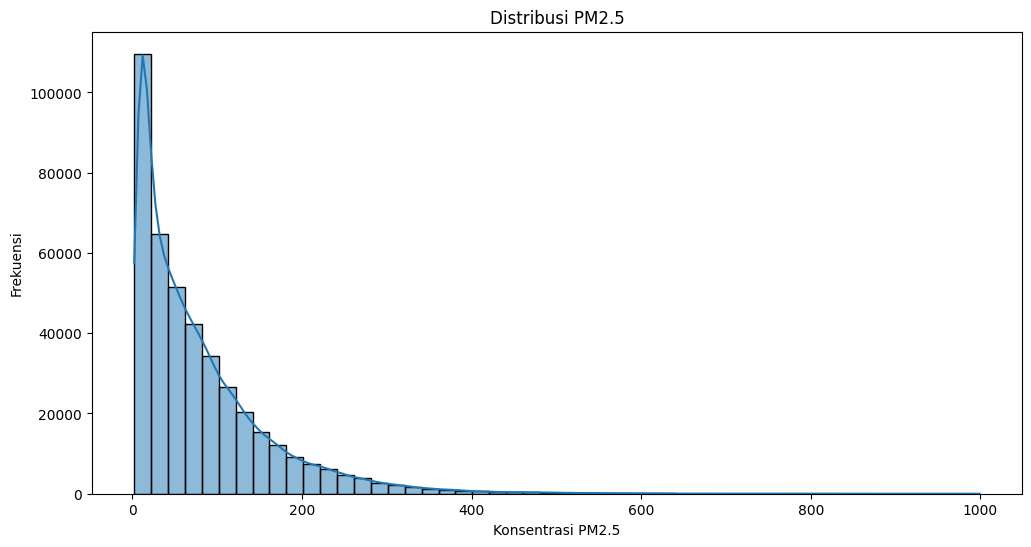

In [ ]:
#mengecek distribusi polutan utama
plt.figure(figsize=(12,6))
sns.histplot(all_data_cleaned['PM2.5'], bins=50, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distiburi miring ke kanan  (right-skewed), kebanyakan nilai konsentrasi di kisaran rendah (0-100). Sementara kondisi ekstrem (200+ hingga 8000) sangat sedikit.
- Sebagian besar data menunjukkan kualitas udara yang baik hingga sedang karena: nilai PM2.5 dibawah 50 umumnya diangga baik, 50-100 seadng, dan diatas 100 dianggap tidak sehat.
- Ada beberapa outlier PM 2.5 diatas 400, yang mungkin disebabkan oleh insiden atau polusi ektrem.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pengaruh cuaca terhadap polusi udara

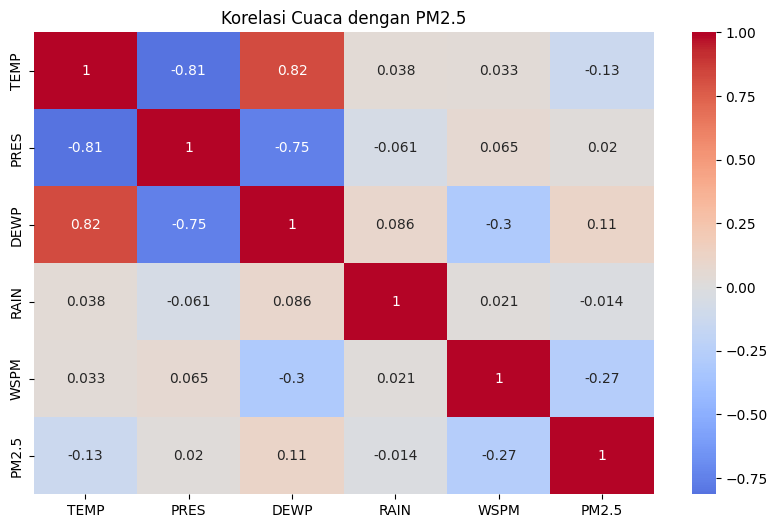

In [ ]:
cuaca_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
pollution_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(10,6))
sns.heatmap(all_data_cleaned[cuaca_cols + ['PM2.5']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Cuaca dengan PM2.5')
plt.show()


**Insight:**
- Dari heatmap di atas ditemukan bahwa ada hubungan linier antara DEWP (kelembapan udara) dan TEMP (suhu). Jadi semakin tinggi suhu maka menjadi semakin lembap.
- Selain itu ditemukan hubungan berbanding terbalik antara TEMP (suhu) dan PRES (tekanan udara) serta antara DEWP (kelembapan udara) dengan PRES (tekanan udara). Sehingga semakin tekanan udara maka suhu dan tekanan udara menjadi lebih rendah.
- Selain itu ditemukan bahwa hubungan cuaca paling berkorelasi dengan PM2.5 adalah WSPM (kecepatan angin) dan DEWP (kelembapan udara). Data ini menunjukkan bahwa rendahnya kecepatan angin dan kelembapan udara yang tinggi dapat menjebak polutan di dekat permukaan tanah.

### Pertanyaan 2:

Waktu terbaik untuk melakukan aktivitas outdoor

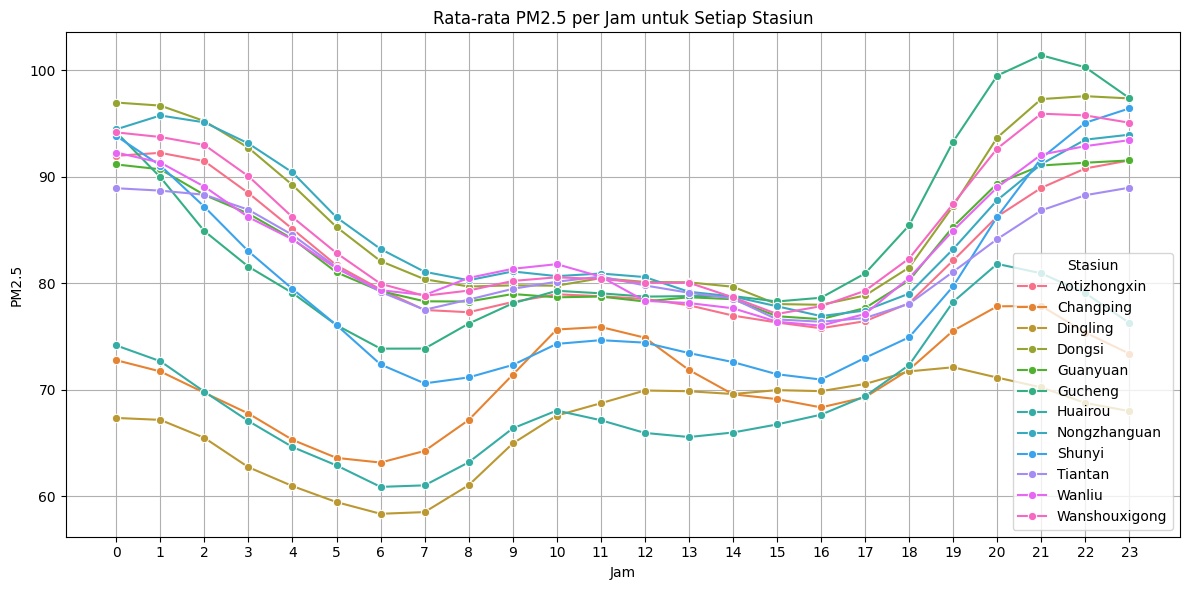

In [ ]:
#mengesktrak waktu 'hour' untuk mencari rata-rata polutan
all_data_cleaned['hour'] = all_data_cleaned.index.hour

#menghitung rata-rata PM2.5 per jam per stasiun
hourly_avg = all_data_cleaned.groupby(['station', 'hour'])['PM2.5'].mean().reset_index()

#membuat visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_avg, x='hour', y='PM2.5', hue='station', marker='o')

plt.title("Rata-rata PM2.5 per Jam untuk Setiap Stasiun")
plt.xlabel("Jam")
plt.ylabel("PM2.5")
plt.xticks(range(0, 24))  # Jam dari 0–23
plt.grid(True)
plt.legend(title='Stasiun')
plt.tight_layout()
plt.show()

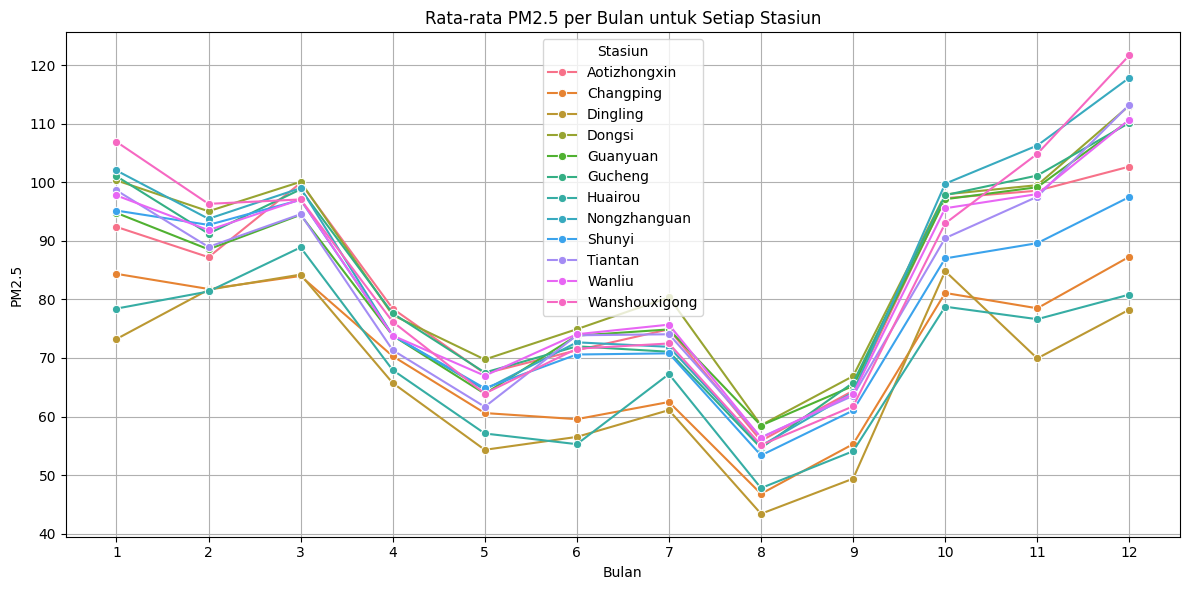

In [ ]:
#mengessktrak bulan dari datetime index
all_data_cleaned['month'] = all_data_cleaned.index.month

#menghitung rata-rata PM2.5 per bulan per stasiun
monthly_avg = all_data_cleaned.groupby(['station', 'month'])['PM2.5'].mean().reset_index()

#visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='month', y='PM2.5', hue='station', marker='o')

plt.title("Rata-rata PM2.5 per Bulan untuk Setiap Stasiun")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(range(1,13))
plt.grid(True)
plt.legend(title='Stasiun')
plt.tight_layout()
plt.show()


**Insight:**
- Dari grafik rata-rata polutan per jam berdasarkan stasiun, tren umum PM2.5 cenderung lebih tinggi di malam dan dini hari, lalu menurun di pagi dan siang, kemudian kembali naik pada sore hingga malam hari. Ini bisa disebabkan aktivitas manusia dan kondisi atmosfir. Seperti yang kita ketahui sebelumnya bahwa kelembapan dan kecepatan angin dapat menjebak polutan udara di dekat permukaan tanah.
- Berdasarkan stasiun, ada beberapa stasiun (misal: Guanyuan atau Nongzhanguan) mencatat PM2.5 yang konsisten lebih tinggi daripada lainnya, mungkin karena berada di lokasi dengan emisi tinggi (perkotaan, lalu lintas padat, industri).
- Sehingga berdasarkan data di atas kami menyarankan waktu terbaik untuk aktivitas outdoor adalah untuk pagi hari 6-8 pagi dan siang hingga sore di rentang jam 12-16.
- Sementara berdasarkan bulan, diperoleh informasi bahwa polutan paling rendah pada bulan 7 hingga 8 dan memuncak pada bulan 11-12. Sehingga kami menyarankan untuk aktivitas outdoor terbaik pada bulan pertengahan Juli hingga pertengahan Agustus.



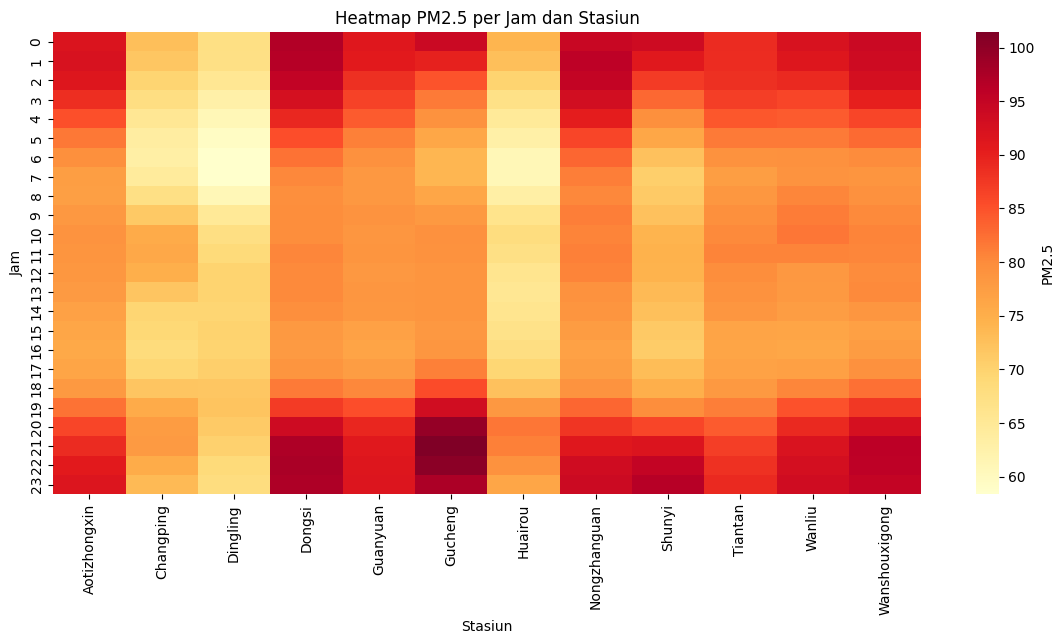

In [ ]:
pivot = all_data_cleaned.pivot_table(index='hour', columns='station', values='PM2.5')
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlOrRd', cbar_kws={'label': 'PM2.5'})
plt.title("Heatmap PM2.5 per Jam dan Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Jam")
plt.show()


In [ ]:
#menghitung rata-rata polutan per stasiun
pollutant_avg = all_data_cleaned.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()
pollutant_avg.columns = ['station', 'avg_PM2.5', 'avg_PM10']

#menghitung proporsi data yang melebihi ambang batas (PM2.5 > 75)
exceedance = all_data_cleaned.copy()
exceedance['PM25_exceed'] = exceedance['PM2.5'] > 75
exceedance['PM10_exceed'] = exceedance['PM10'] > 150

#menghitung frekuensi melebihi batas
exceed_summary = exceedance.groupby('station')[['PM25_exceed', 'PM10_exceed']].mean().reset_index()
exceed_summary.columns = ['station', 'pm25_exceed_ratio', 'pm10_exceed_ratio']

#gabungkan
regulation_df = pollutant_avg.merge(exceed_summary, on='station')

#menambahkan skor gabungan sederhana (kombinasi rata-rata dan frekuensi)
regulation_df['pollution_score'] = (
    regulation_df['avg_PM2.5'] * 0.6 +
    regulation_df['pm25_exceed_ratio'] * 100 * 0.4
)
#mengurutkan dari yang paling perlu diintervensi
regulation_df_sorted = regulation_df.sort_values(by='pollution_score', ascending=False)


catatan: Untuk mengetahui stasiun mana yang memerlukan regulasi intervensi terakit polusi udara berlebihan, kita perlu mengetahui rata-rata polutan dan seberapa sering polutan di stasiun melebihi ambang batas, terakhir kita urutkan dari stasiun yang paling prioritas.

<ipython-input-38-557751087>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


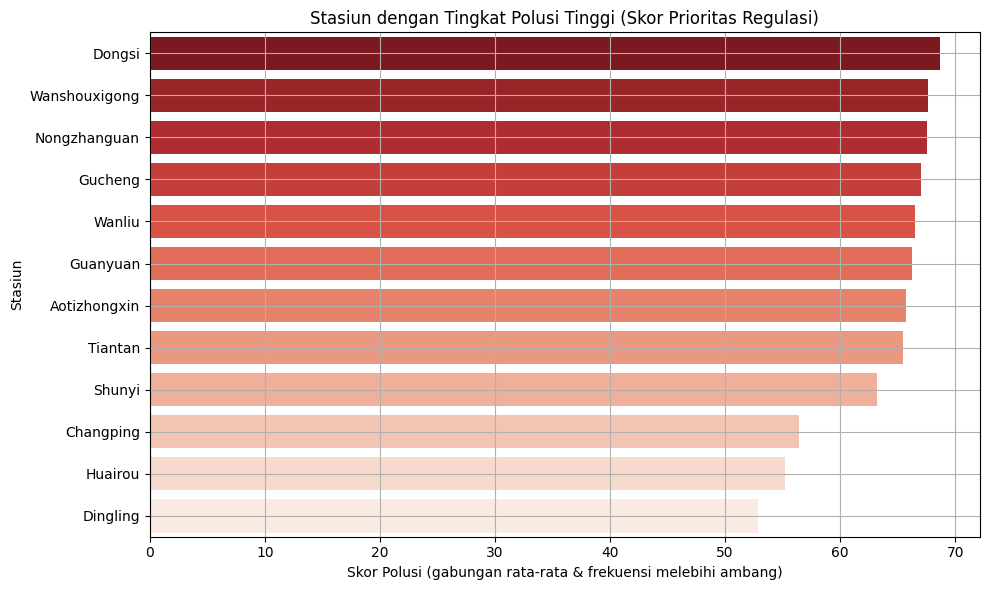

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=regulation_df_sorted,
    x='pollution_score',
    y='station',
    palette='Reds_r'
)
plt.title("Stasiun dengan Tingkat Polusi Tinggi (Skor Prioritas Regulasi)")
plt.xlabel("Skor Polusi (gabungan rata-rata & frekuensi melebihi ambang)")
plt.ylabel("Stasiun")
plt.grid(True)
plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

In [ ]:
#dictionary koordinat (latitude & longitude)
station_coords = {
    'Aotizhongxin': [39.982, 116.397],
    'Changping': [40.218, 116.231],
    'Dingling': [40.290, 116.225],
    'Dongsi': [39.928, 116.417],
    'Guanyuan': [39.929, 116.339],
    'Gucheng': [39.911, 116.184],
    'Huairou': [40.364, 116.628],
    'Nongzhanguan': [39.933, 116.461],
    'Shunyi': [40.125, 116.655],
    'Tiantan': [39.873, 116.413],
    'Wanliu': [39.999, 116.305],
    'Wanshouxigong': [39.879, 116.352]
}


In [ ]:
#jadikan dataframe
station_coords_df = pd.DataFrame.from_dict(
    station_coords, orient='index', columns=['latitude', 'longitude']
).reset_index().rename(columns={'index': 'station'})

#gabungkan dengan dataframe kita sebelumnya all_data_cleaned
all_data_cleaned = all_data_cleaned.reset_index()  # pastikan datetime bukan index dulu
data_with_coords = all_data_cleaned.merge(station_coords_df, on='station', how='left')


In [ ]:
import folium

#rata-rata PM2.5 per stasiun
avg_pm25 = data_with_coords.groupby('station')['PM2.5'].mean().reset_index()
avg_pm25 = avg_pm25.merge(station_coords_df, on='station')

#peta pusatnya di Beijing
m = folium.Map(location=[39.9, 116.4], zoom_start=10)

#marker
for i, row in avg_pm25.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=f"{row['station']}: {row['PM2.5']:.2f} µg/m³",
        color='red' if row['PM2.5'] > 75 else 'orange' if row['PM2.5'] > 35 else 'green',
        fill=True,
        fill_color='red' if row['PM2.5'] > 75 else 'orange' if row['PM2.5'] > 35 else 'green',
        fill_opacity=0.7
    ).add_to(m)

m


**Insight:**

Dari visualisasi dan analisa berdasarkan lokasi, stasiun di pusat perkotaan cenderung memiliki polutan tinggi dibandingkan yang berdada di kejauhan pusat kota. Sehingga dapat disimpulkan bahwa aktivitas manusia dan industri menjadi salah satu penyebab tingginya polusi udara.

## Conclusion

- Polutan udara berkolerasi positif dengan kelembapan udara dan berkolerasi negatif dengan kecepatan angin. Dengan beberapa faktor tambahan seperti suhu.
- Waktu terbaik untuk melakukan aktivitas outdoor adalah pagi pada jam 6-8 pagi dan bulan terbaik untuk aktivitas oudoor adalah pertengahan Juli hingga Agustus.
- Dari 12 stasiun yang dianalisis, kami menyarankan adanya regulasi atau tindakan intervensi pada stasiun Dongsi, Wanshouxigong, dan Nongzhanguan  karena punya rata-rata PM2.5 tinggi dan sering melewati ambang batas aman.